In [1]:
import pennylane as qml
from qiskit import QuantumCircuit

In [2]:
dev = qml.device('default.qubit', wires=2)

In [3]:
dev

<DefaultQubit device (wires=2, shots=None) at 0x7f5d0144fd90>

In [4]:
@qml.qnode(dev)
def bell_state():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

In [5]:
state = bell_state()

In [6]:
print("|psi> =", state)

|psi> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [8]:
print(qml.draw(bell_state)())

0: ──H─╭●─┤  State
1: ────╰X─┤  State


In [10]:
import matplotlib.pyplot as plt

In [12]:
qml.drawer.available_styles()

('black_white',
 'black_white_dark',
 'sketch',
 'sketch_dark',
 'solarized_light',
 'solarized_dark',
 'default')

In [13]:
qml.drawer.use_style("black_white")

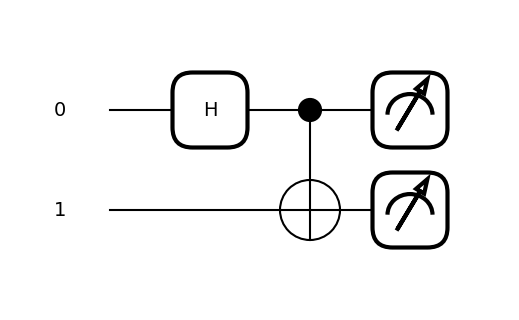

In [14]:
fig, ax = qml.draw_mpl(bell_state)()
plt.show()

In [15]:
qml.drawer.use_style("sketch")

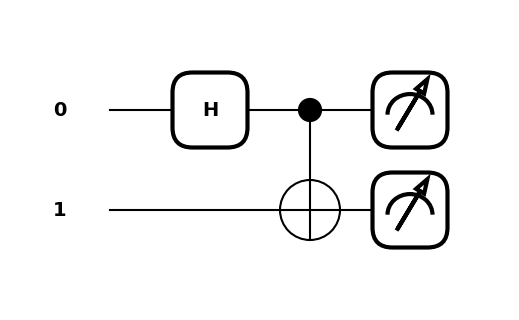

In [16]:
fig, ax = qml.draw_mpl(bell_state)()
plt.show()

In [17]:
@qml.qnode(dev)
def bell_state_measure():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=[0,1])

In [18]:
probs = bell_state_measure()

In [19]:
probs

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

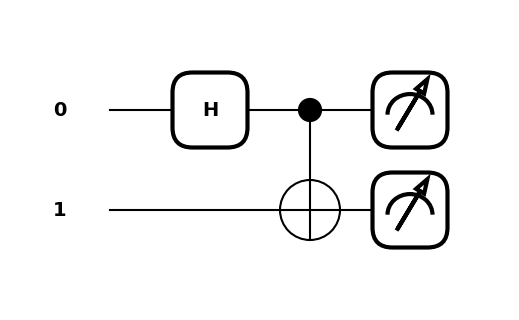

In [20]:
fig, ax = qml.draw_mpl(bell_state_measure)()
plt.show()

In [51]:
@qml.qnode(dev)
def inv_cnot(x):
    qml.AmplitudeEmbedding(features=x, wires=range(2), normalize=True)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0,1])

In [52]:
import numpy as np

In [53]:
X = np.matrix("1 0 1 0; 1 0 0 1; 0 1 1 0; 0 1 0 1")
X = np.array(X)
X

array([[1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1]])

In [54]:
for i in range(X.shape[0]):
    x = X[i,:]
    print(x)
    probs = inv_cnot(x)
    print(probs)

[1 0 1 0]
[0.5 0.  0.5 0. ]
[1 0 0 1]
[0.5 0.5 0.  0. ]
[0 1 1 0]
[0.  0.  0.5 0.5]
[0 1 0 1]
[0.  0.5 0.  0.5]


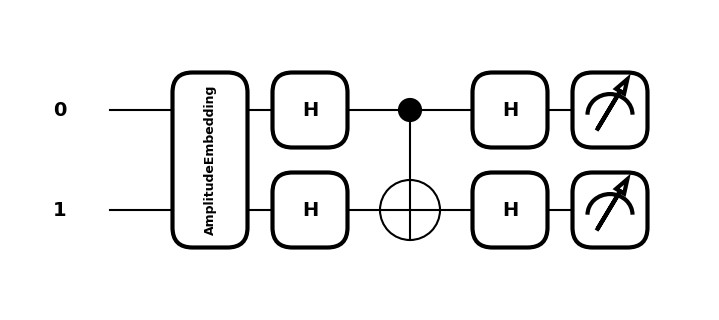

In [57]:
fig, ax = qml.draw_mpl(inv_cnot)([1,0,1,0])
plt.show()